결정트리
==
데이터
--
- 붓꽃(iris) 분류 데이터


In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

### 먼저 4개의 속성 중, 2개의 속성만 사용
- 꽃받침(sepal)의 길이(length)
- 꽃받침의(sepal) 폭(width)

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
X = iris.data[:, :2]
y = iris.target

In [7]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

### 결정 트리 모델 생성
- 훈련 데이터로 훈련 : 깊이는 2 로 제한
- 지니 불순도가 가장 작은 값도록 결정 트리 생성

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
clf = DecisionTreeClassifier(max_depth = 2)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

결정 트리 그래프 그리기 (옵션)
--

Graphviz 설치
--

- graphviz.org 사이트에서 다운로드 후 설치
- 윈도우 버전:
1. https://graphviz.gitlab.io/_pages/Download/Download_windows.html 접속
   - msi 파일 다운로드후, 설치
2. 시스템 환경변수 path에 추가
   - 파일 위치\graphviz2.38\bin
   - 파일 위치\graphviz2.38\bin\dot.exe(안 해도 됨)
3. Jupyter Notebook(파이썬)에서는
   - import os
   - os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

In [10]:
!pip install graphviz

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [11]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

In [12]:
!python -m pip install --upgrade pip

  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [15]:
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(
    clf,
    out_file = "./iris.dot",
    feature_names = iris.feature_names[:2],
    class_names = iris.target_names,
    filled = True
    )

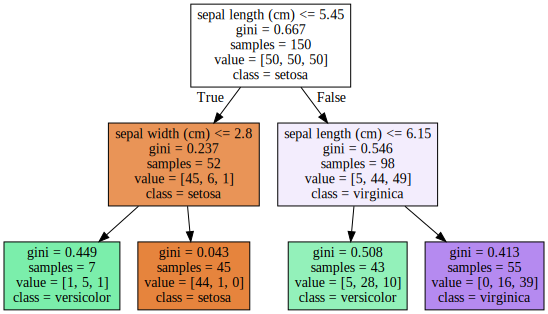

In [14]:
with open("./iris.dot") as f:
    dot_graph = str(open("./iris.dot", "rb").read(), "utf8")
graphviz.Source(dot_graph)

#### UTF-8 : Universal Coded Character Set + Transformation Format – 8-bit 
- 유니코드 한 문자를 나타내기 위해 1바이트에서 4바이트까지를 사용
- U+007F까지의 문자는 7비트 ASCII 문자와 동일한 방법으로 표시
- 7비트 ASCII 문자와 혼동되지 않게 하기 위하여 모든 바이트들의 최상위 비트는 1이다.

결정 경계선 그리기
--

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Sepal width')

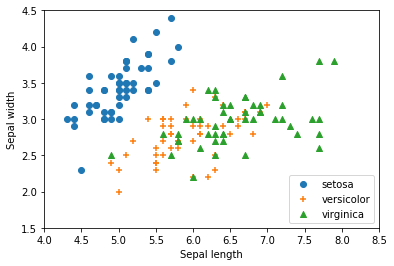

In [17]:
plt.xlim(4, 8.5)
plt.ylim(1.5, 4.5)

markers = ['o', '+', '^']
for i in range(3):
    xs = X[:, 0][y == i]
    ys = X[:, 1][y == i]
    plt.scatter(xs, ys, marker=markers[i])
    
plt.legend(iris.target_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

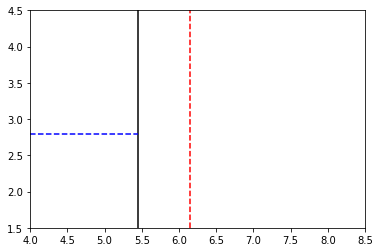

In [19]:
plt.xlim(4, 8.5)
plt.ylim(1.5, 4.5)

# 결정 트리 경계선: 실선은 루트 노드 점선은 자식 노드
xx = np.linspace(5.45, 5.45, 3)
yy = np.linspace(1.5, 4.5, 3)
plt.plot(xx, yy, '-k') # 검정색 실선

xx = np.linspace(4, 5.45, 3)
yy = np.linspace(2.8, 2.8, 3)
plt.plot(xx, yy, '--b') # 파란색 점선

xx = np.linspace(6.15, 6.15, 3)
yy = np.linspace(1.5, 4.5, 3)
plt.plot(xx, yy, '--r') # 붉은색 점선


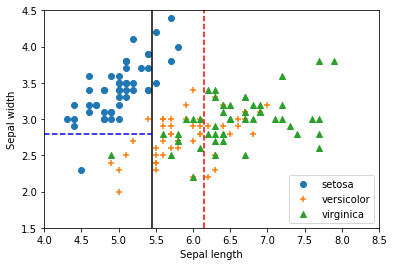

In [18]:
# 데이터의 표현
plt.xlim(4, 8.5)
plt.ylim(1.5, 4.5)

markers = ['o', '+', '^']
for i in range(3):
    xs = X[:, 0][y == i]
    ys = X[:, 1][y == i]
    plt.scatter(xs, ys, marker=markers[i])
    
plt.legend(iris.target_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

# 결정 트리 경계선: 실선은 루트 노드 점선은 자식 노드
xx = np.linspace(5.45, 5.45, 3)
yy = np.linspace(1.5, 4.5, 3)
plt.plot(xx, yy, '-k') # 검정색 실선

xx = np.linspace(4, 5.45, 3)
yy = np.linspace(2.8, 2.8, 3)
plt.plot(xx, yy, '--b') # 파란색 점선

xx = np.linspace(6.15, 6.15, 3)
yy = np.linspace(1.5, 4.5, 3)
plt.plot(xx, yy, '--r') # 붉은색 점선

### 학습된 결정 트리를 이용
### 임의의 샘플에 대하여, 어느 Class에 속할 지 예측
- predict() 

In [19]:
print(clf.predict([[5.5, 4]]))

[1]


### 모든 Class에 속할 확률 계산
- predict_proba()
- 이러한 값을 이용하여 soft voting을 도입하면 보다 정확한 다중 분류 수행 가능

In [17]:
print(clf.predict_proba([[5.5, 4]]))

[[0.11627907 0.65116279 0.23255814]]


## 트리 내부 변수
### 유방암 분류
- 진단 결과 : M (악성, malignant), B (양성, benign)

In [20]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [21]:
cancer = load_breast_cancer() 

- 입력 데이터 : cancer.data
- 레이블 데이터 : cancer.target

In [22]:
cancer.data.shape

(569, 30)

In [23]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [24]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

- 구성 비가 다른 불균형 데이터를 이용해서 train/test 데이터로 분리할 경우
- 자칫 작은 구성비를 가진 데이터들이 모두 train 또는 test데이터로 분리된다면
-  제대로 학습과 테스트를 진행할 수가 없다.
- 따라서 구성 비가 다른 불균형 데이터를 다룰 때는 
    - Stratified가 붙은 클래스를 이용하거나 
    - stratify옵션을 켜야한다

- stratify : 지정한 Data의 비율을 유지한다. 
- 예를 들어, Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, 
- stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다

In [25]:
np.random.seed(9)

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target) 

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

print(clf.score(X_test, y_test))

0.916083916083916


■ 모델의 내부 변수
- feature_importances_ : 결정 트리를 만드는데 각 특성이 기여한 정도

In [26]:
list(zip(cancer.feature_names, clf.feature_importances_.round(4)))

[('mean radius', 0.0),
 ('mean texture', 0.0417),
 ('mean perimeter', 0.0),
 ('mean area', 0.0),
 ('mean smoothness', 0.0),
 ('mean compactness', 0.0),
 ('mean concavity', 0.0),
 ('mean concave points', 0.0426),
 ('mean symmetry', 0.0114),
 ('mean fractal dimension', 0.0),
 ('radius error', 0.0),
 ('texture error', 0.0),
 ('perimeter error', 0.0),
 ('area error', 0.0172),
 ('smoothness error', 0.0024),
 ('compactness error', 0.012),
 ('concavity error', 0.0),
 ('concave points error', 0.0),
 ('symmetry error', 0.0),
 ('fractal dimension error', 0.0),
 ('worst radius', 0.0172),
 ('worst texture', 0.0396),
 ('worst perimeter', 0.6947),
 ('worst area', 0.0),
 ('worst smoothness', 0.0),
 ('worst compactness', 0.0),
 ('worst concavity', 0.0),
 ('worst concave points', 0.1211),
 ('worst symmetry', 0.0),
 ('worst fractal dimension', 0.0)]

- 각 특징의 중요도를 DataFrame 으로 생성
- 중요도가 높은 순서로 상위 10개 특성을 출력

In [27]:
df = pd.DataFrame({'feature':cancer.feature_names,'importance':clf.feature_importances_ })

In [28]:
df

,feature,importance
0,mean radius,0.000000
1,mean texture,0.041720
2,mean perimeter,0.000000
3,mean area,0.000000
4,mean smoothness,0.000000
5,mean compactness,0.000000
6,mean concavity,0.000000
7,mean concave points,0.042647
8,mean symmetry,0.011405
9,mean fractal dimension,0.000000


In [28]:
df=df.sort_values('importance', ascending=False) 
print(df.head(10))

                 feature  importance
22       worst perimeter    0.694689
27  worst concave points    0.121068
7    mean concave points    0.042647
1           mean texture    0.041720
21         worst texture    0.039639
13            area error    0.017216
20          worst radius    0.017188
15     compactness error    0.012042
8          mean symmetry    0.011405
14      smoothness error    0.002385


- 각 특성의 기여도를 바 차트로 그리는 코드
- 바 차트를 수평(horizontal)로 그리기 위해서 barh 함수를 사용
    - yticks(ticks, [labels], **kwargs)

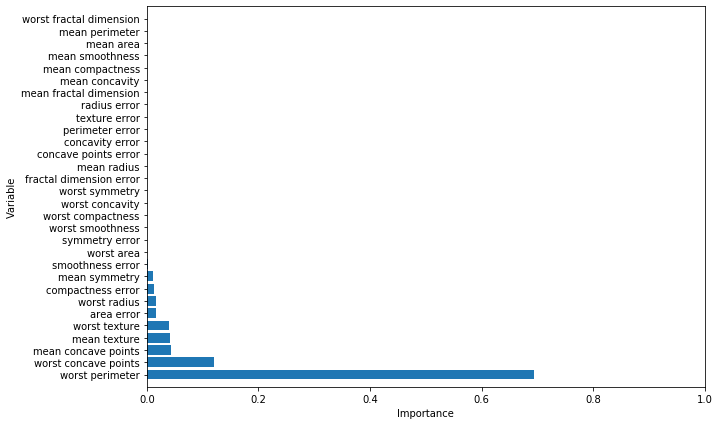

In [29]:
x = df.feature
y = df.importance
ypos = np.arange(len(x))
plt.figure(figsize=(10,7)) 
plt.barh(x, y) 
plt.yticks(ypos, x) 
plt.xlabel('Importance') 
plt.ylabel('Variable') 
plt.xlim(0, 1) 
plt.ylim(-1, len(x)) 
plt.show()